# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [5]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
print(y_pred_test[:5])
print("\n")
print(y_pred_train[:5])

[[18.86318036]
 [19.33606368]
 [22.9091882 ]
 [13.65405402]
 [22.84282553]]


[[36.83056117]
 [38.77209587]
 [24.12775312]
 [30.61507   ]
 [26.49145619]]


## 3. Calculate and print R-squared for both the training and the testing set.

In [6]:
from sklearn import metrics
R2_test = lr.score(X_test, y_test)
R2_train = lr.score(X_train, y_train)
print(f"R2_test: {R2_test}")
print(f"R2_train: {R2_train}")

R2_test: 0.7492525898678417
R2_train: 0.7339185537613342


## 4. Calculate and print mean squared error for both the training and the testing set.

In [7]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print(f"MSE_train: {MSE_train}")
print(f"MSE_test: {MSE_test}")

MSE_train: 21.989400236809946
MSE_test: 22.8843782730181


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [8]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print(f"MAE_train: {MAE_train}")
print(f"MAE_test: {MAE_test}")

MAE_train: 3.3397796303957596
MAE_test: 3.3746370386330184


## Classification Model Evaluation

In [9]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [18]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

y_pred_test = log.predict(X_test)
y_pred_train = log.predict(X_train)

/Users/edu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/edu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Prediction test

In [13]:
y_test["y_pred_test"] = y_pred_test
y_test.head()

<ipython-input-13-1c433864625c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["y_pred_test"] = y_pred_test


,class,y_pred_test
32,0,0
20,0,0
26,0,0
11,0,0
141,2,2


#### Prediction train

In [14]:
y_train["y_pred_train"] = y_pred_train
y_train.head()

<ipython-input-14-e51af0cbe97d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train["y_pred_train"] = y_pred_train


,class,y_pred_train
142,2,2
68,1,1
149,2,2
121,2,2
76,1,1


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, balanced_accuracy_score,confusion_matrix

In [19]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"accuracy_train: {accuracy_train}")
print(f"accuracy_test: {accuracy_test}")

accuracy_train: 0.95
accuracy_test: 0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [20]:
bal_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
bal_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)
print(f"bal_accuracy_train: {bal_accuracy_train}")
print(f"bal_accuracy_test: {bal_accuracy_test}")

bal_accuracy_train: 0.9484126984126985
bal_accuracy_test: 0.9761904761904763


## 10. Calculate and print the precision score for both the training and the testing set.

In [24]:
precision_train = precision_score(y_train, y_pred_train, average='macro')
precision_test = precision_score(y_test, y_pred_test, average='macro')
print(f"precision_train: {precision_train}")
print(f"precision_test: {precision_test}")

precision_train: 0.9484126984126985
precision_test: 0.9629629629629629


## 11. Calculate and print the recall score for both the training and the testing set.

In [25]:
recall_train = recall_score(y_train, y_pred_train, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"recall_train: {recall_train}")
print(f"recall_test: {recall_test}")

recall_train: 0.9484126984126985
recall_test: 0.9761904761904763


## 12. Calculate and print the F1 score for both the training and the testing set.

In [31]:
f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
print(f"recall_train: {f1_train}")
print(f"recall_test: {f1_test}")

recall_train: 0.9484126984126985
recall_test: 0.9680464778503994


## 13. Generate confusion matrices for both the training and the testing set.

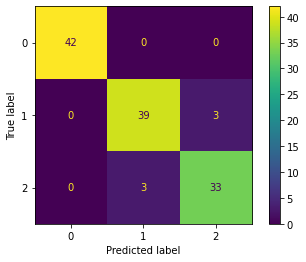

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train)).plot()

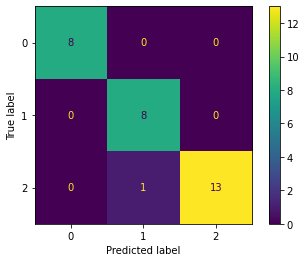

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test)).plot()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.